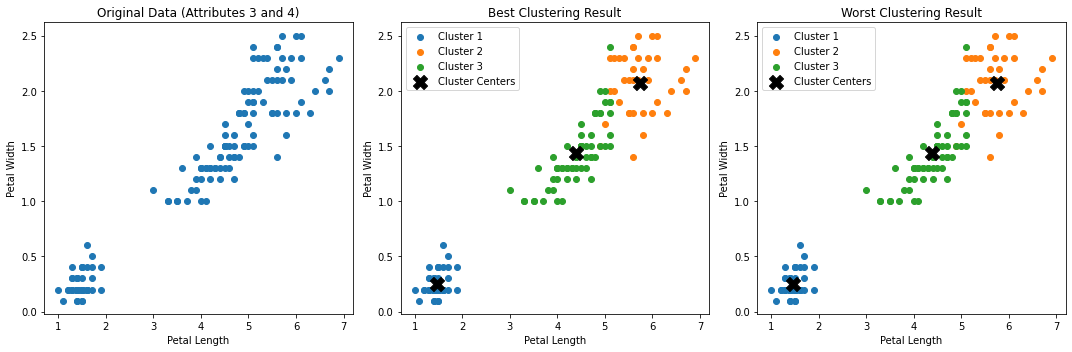

Distance between best result centers and original centers:
[2.99920056 0.1953708  3.16307025]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Select columns 1, 2, 3, and 4
X = data.iloc[:, [0, 1, 2, 3]].values

# Number of clusters (K) for K-means
K = 3

# Number of iterations
num_iterations = 5

# Initialize variables to store best and worst results
best_kmeans = None
best_score = np.inf
worst_kmeans = None
worst_score = -np.inf

# Initialize an array to store distances
distances = []

# Perform K-means clustering with K=3 multiple times
for _ in range(num_iterations):
    # Initialize random cluster centers
    np.random.seed()
    random_indices = np.random.choice(len(X), K, replace=False)
    centers = X[random_indices]
    
    # Initialize cluster assignments
    cluster_assignments = np.zeros(len(X))
    
    # Maximum number of iterations for convergence
    max_iterations = 100
    
    for _ in range(max_iterations):
        # Calculate distances between data points and cluster centers
        distances_to_centers = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        
        # Assign each data point to the nearest cluster
        new_cluster_assignments = np.argmin(distances_to_centers, axis=1)
        
        # Check for convergence
        if np.array_equal(cluster_assignments, new_cluster_assignments):
            break
        
        cluster_assignments = new_cluster_assignments
        
        # Update cluster centers
        for i in range(K):
            centers[i] = np.mean(X[cluster_assignments == i], axis=0)
    
    # Calculate the sum of squared distances (inertia) for this result
    inertia = np.sum([np.sum((X[cluster_assignments == i] - centers[i])**2) for i in range(K)])
    
    # Check if this result is the best or worst
    if inertia < best_score:
        best_score = inertia
        best_kmeans = {
            'cluster_centers': centers,
            'cluster_assignments': cluster_assignments
        }
    if inertia > worst_score:
        worst_score = inertia
        worst_kmeans = {
            'cluster_centers': centers,
            'cluster_assignments': cluster_assignments
        }

# Get cluster centers for best and worst results
best_centers = best_kmeans['cluster_centers']
worst_centers = worst_kmeans['cluster_centers']
best_cluster_assignments = best_kmeans['cluster_assignments']
worst_cluster_assignments = worst_kmeans['cluster_assignments']

# Plot the original data without specifying cluster assignments
plt.figure(figsize=(15, 5))

# Plot original data
plt.subplot(1, 3, 1)
plt.scatter(X[:, 2], X[:, 3])
plt.title('Original Data (Attributes 3 and 4)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot best result
plt.subplot(1, 3, 2)
for i in range(K):
    plt.scatter(X[best_cluster_assignments == i, 2], X[best_cluster_assignments == i, 3], label=f'Cluster {i + 1}')
plt.scatter(best_centers[:, 2], best_centers[:, 3], s=200, c='black', marker='X', label='Cluster Centers')
plt.title('Best Clustering Result')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Plot worst result
plt.subplot(1, 3, 3)
for i in range(K):
    plt.scatter(X[worst_cluster_assignments == i, 2], X[worst_cluster_assignments == i, 3], label=f'Cluster {i + 1}')
plt.scatter(worst_centers[:, 2], worst_centers[:, 3], s=200, c='black', marker='X', label='Cluster Centers')
plt.title('Worst Clustering Result')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the distance between best result centers and original centers (using attributes 3 and 4)
original_centers = np.array([[4.26, 1.326], [5.552, 2.026], [1.462, 0.246]])  # Original centers based on attributes 3 and 4
distance = np.linalg.norm(best_centers[:, [2, 3]] - original_centers, axis=1)

print("Distance between best result centers and original centers:")
print(distance)
